# Git

In [9]:
!git init

Reinitialized existing Git repository in C:/Users/ossama/Desktop/AnnÃ©e 5 ESILV/Python for data/Final/.git/


In [17]:
!git add *

The file will have its original line endings in your working directory.


In [15]:
!git clone https://github.com/ossama95/Python-DataAnalysis

Cloning into 'Python-DataAnalysis'...


In [18]:
!git commit -m "V1"


[master a4154e0] V1
 1 file changed, 24 insertions(+), 15 deletions(-)


# Data-vis

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
dataset = pd.read_csv('avila/avila-tr.txt', sep=",", header=None)

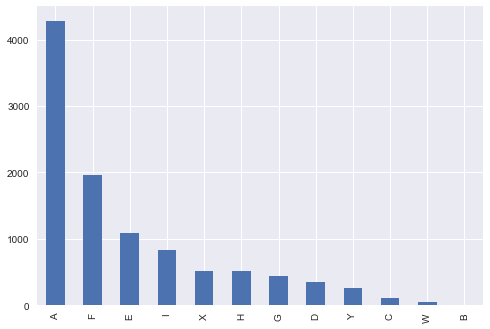

In [4]:
dataset[10].value_counts().plot.bar()
plt.show()

In [5]:
columns_name = {
0:      "intercolumnar distance",
1:      "upper margin", 
2:      "lower margin",
3:      "exploitation",
4:      "row number", 
5:      "modular ratio", 
6:      "interlinear spacing", 
7:      "weight", 
8:      "peak number", 
9:      "modular ratio/ interlinear spacing",
10:     "Class"
}

In [6]:
dataset.rename(columns=columns_name,inplace=True) 

In [7]:
dataset.columns

Index(['intercolumnar distance', 'upper margin', 'lower margin',
       'exploitation', 'row number', 'modular ratio', 'interlinear spacing',
       'weight', 'peak number', 'modular ratio/ interlinear spacing', 'Class'],
      dtype='object')

In [8]:
dataset.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [9]:
print(dataset.shape)


(10430, 11)


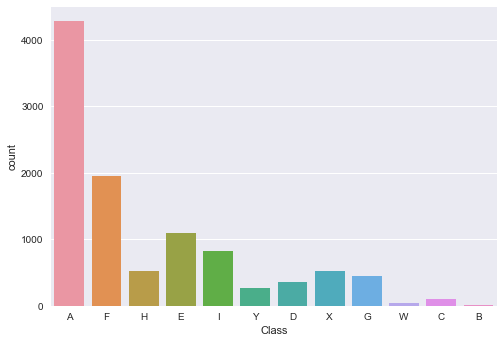

In [10]:
sns.countplot(dataset['Class'],label="Count")
plt.show()

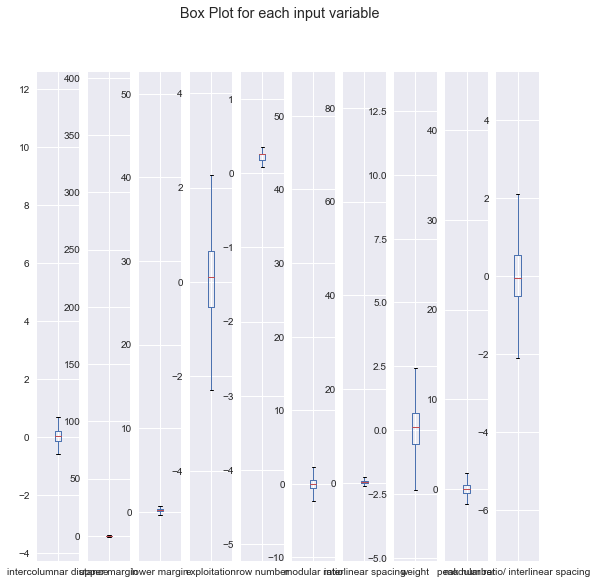

In [11]:
dataset.drop('Class', axis=1).plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.show()

In [12]:
dataset.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


# Data prép

#### Tout le dataset est dèja cleen. Les données ont été normalisées à l’aide de la méthode de normalisation Z et divisées en deux ensembles de données

In [13]:
features = ["intercolumnar distance","upper margin", "lower margin","exploitation","row number", "modular ratio", "interlinear spacing", "weight", "peak number", "modular ratio/ interlinear spacing"]
X = dataset[features]
y = dataset['Class']

# Modelisation

### La tâche de prédiction consiste à associer chaque motif à l’un des 12 copistes (A, B, C, D, E, F, G, H, I, W, X, Y).

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
testset = pd.read_csv('avila/avila-ts.txt', sep=",", header=None)
testset.rename(columns=columns_name,inplace=True) 

X_test2 = testset[features]
y_test2 = testset['Class']

### Logistic Regression


In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test2, y_test2)))

Accuracy of Logistic regression classifier on training set: 0.47
Accuracy of Logistic regression classifier on test set: 0.44


### Decision Tree


In [53]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test2, y_test2)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.26


### K-NN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test2, y_test2)))

Accuracy of K-NN classifier on training set: 0.65
Accuracy of K-NN classifier on test set: 0.45


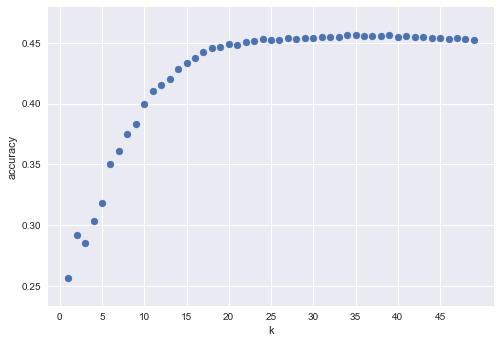

In [51]:
k_range = range(1, 50)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test2, y_test2))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0,50,5))
plt.show()

In [56]:

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test2, y_test2)))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test2, y_test2)))

print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test2, y_test2)))

Accuracy of Logistic regression classifier on test set: 0.44
Accuracy of Decision Tree classifier on test set: 0.26
Accuracy of K-NN classifier on test set: 0.45


# Optimisation : Grid search

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000] 

hyperparameters = dict(C=C, penalty=penalty)
clf_logreg = RandomizedSearchCV(LogisticRegression(), param_distributions = hyperparameters, cv = 5, verbose=5, random_state=42, n_jobs = -1)
# clf_logreg = GridSearchCV(LogisticRegression, hyperparameters, n_jobs=-1,cv=5, verbose=0)
clf_logreg.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:   30.0s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.2s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=5)

In [24]:
print('Accuracy of LogisticRegression classifier on test set: {:.2f}'
     .format(clf_logreg.score(X_test2, y_test2)))

Accuracy of LogisticRegression classifier on test set: 0.27


In [36]:

parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,500,10)}

clf_tree= DecisionTreeClassifier()
clf_decisiontree = RandomizedSearchCV(estimator = clf_tree, param_distributions = parameters, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
clf_decisiontree.fit(X_train,y_train)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 235 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:    9.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    9.1s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'min_samples_split': range(10, 500, 20), 'max_depth': range(1, 500, 10)},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [37]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test2, y_test2)))

Accuracy of Decision Tree classifier on test set: 0.26


# Resultats 

In [58]:
from sklearn import model_selection

seed = 7
models = []
models.append(('LR', clf_logreg))
models.append(('KNN', knn))
models.append(('CART', clf_decisiontree))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_test2, y_test2, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:   12.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.4s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:   11.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.0s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:   12.1s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:   12.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:   12.1s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:   12.2s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.4s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:   11.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.0s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:   11.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:   12.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:   12.1s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.3s finished


LR: 0.533390 (0.010082)
KNN: 0.677777 (0.013223)
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:    9.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    9.9s finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:    9.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    9.7s finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:    9.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    9.8s finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:    9.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    9.9s finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:    9.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    9.9s finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    9.8s finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:    9.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    9.8s finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   10.0s finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:    9.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    9.9s finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    9.8s finished


CART: 0.948355 (0.015641)


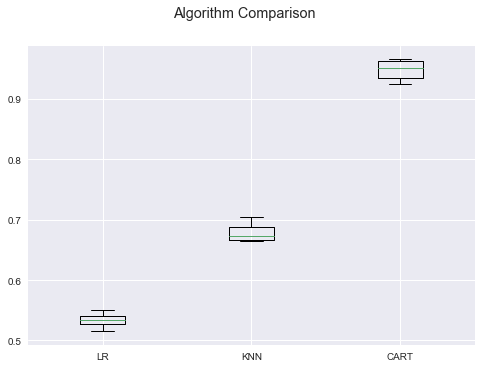

In [59]:
plt.show()

In [60]:
from numpy import mean

In [61]:
print(mean(results[-1]))

0.948355025108


# On constate que parmis les trois algorithmes DecisionTreeClassifier obtient le meilleur résultat sur le dataset de test avec un AUC de 0.94